In [17]:

df5 = pd.read_csv('processed.cleveland.csv')
df5

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 50)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


df = pd.read_csv('datasets_33180_43520_heart.csv')
data = df.copy()
dt = df.copy()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [15]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [2]:
#cp - chest_pain_type
df.loc[df['cp'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['cp'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['cp'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['cp'] == 3, 'chest_pain_type'] = 'typical angina'
#restecg - rest_ecg_type
df.loc[df['restecg'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['restecg'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['restecg'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'
#slope - st_slope_type
df.loc[df['slope'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['slope'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['slope'] == 2, 'st_slope_type'] = 'upsloping'
#thal - thalassemia_type
#df.loc[df['thal'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thal'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thal'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thal'] == 3, 'thalassemia_type'] = 'reversable defect'
#target
#df.loc[df['target'] == 0, 'target'] = 'heart disease'
#df.loc[df['target'] == 1, 'target'] = ' no heart disease'
#sex
df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'
#fbs
df.loc[df['fbs'] == 0, 'fbs'] = '< 120 mg/dl'
df.loc[df['fbs'] == 1, 'fbs'] = '> 120 mg/dl'


df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chest_pain_type,rest_ecg_type,st_slope_type,thalassemia_type
0,63,male,3,145,233,> 120 mg/dl,0,150,0,2.3,0,0,1,1,typical angina,left ventricular hypertrophy,downsloping,fixed defect
1,37,male,2,130,250,< 120 mg/dl,1,187,0,3.5,0,0,2,1,non-anginal pain,normal,downsloping,normal
2,41,female,1,130,204,< 120 mg/dl,0,172,0,1.4,2,0,2,1,atypical angina,left ventricular hypertrophy,upsloping,normal
3,56,male,1,120,236,< 120 mg/dl,1,178,0,0.8,2,0,2,1,atypical angina,normal,upsloping,normal
4,57,female,0,120,354,< 120 mg/dl,1,163,1,0.6,2,0,2,1,asymptomatic,normal,upsloping,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,< 120 mg/dl,1,123,1,0.2,1,0,3,0,asymptomatic,normal,flat,reversable defect
299,45,male,3,110,264,< 120 mg/dl,1,132,0,1.2,1,0,3,0,typical angina,normal,flat,reversable defect
300,68,male,0,144,193,> 120 mg/dl,1,141,0,3.4,1,2,3,0,asymptomatic,normal,flat,reversable defect
301,57,male,0,130,131,< 120 mg/dl,1,115,1,1.2,1,1,3,0,asymptomatic,normal,flat,reversable defect


In [4]:
# I ll have a look of mean values for each scoring to have general idea
group = df.groupby(by='target')[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].mean()
group

,age,trestbps,chol,thalach,oldpeak
target,,,,,
no heart disease,52.496970,129.303030,242.230303,158.466667,0.583030
heart disease,56.601449,134.398551,251.086957,139.101449,1.585507


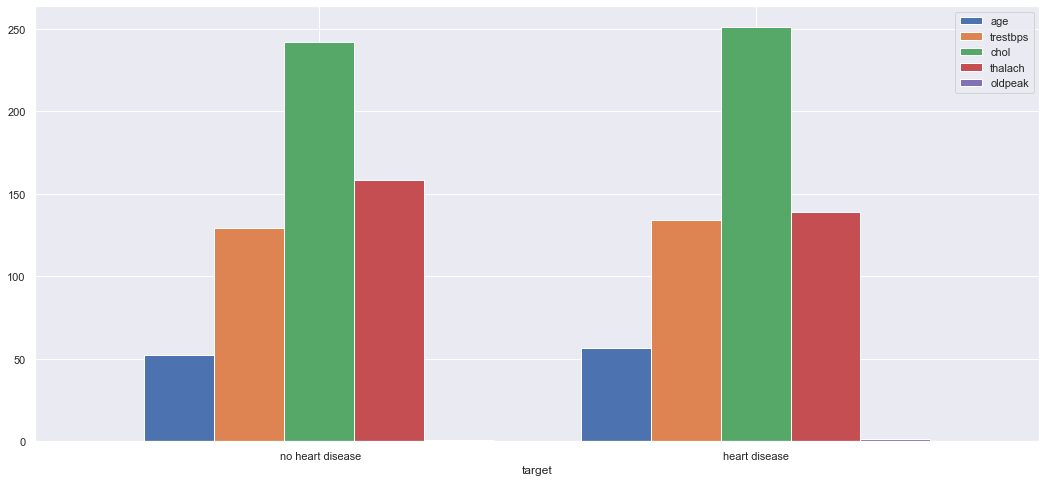

In [31]:
group.plot.bar(figsize=(18,8), width=0.8)
plt.xticks(rotation=360)
plt.show()

In [33]:
# showing that data is balanced
#sns.countplot(x="target", data=df)
#plt.show()

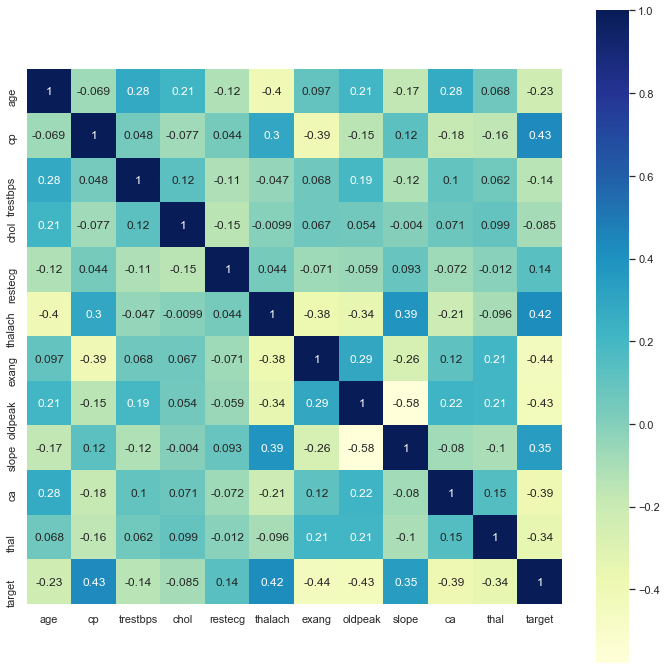

In [37]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, square=True,cmap="YlGnBu")

In [ ]:
#From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.

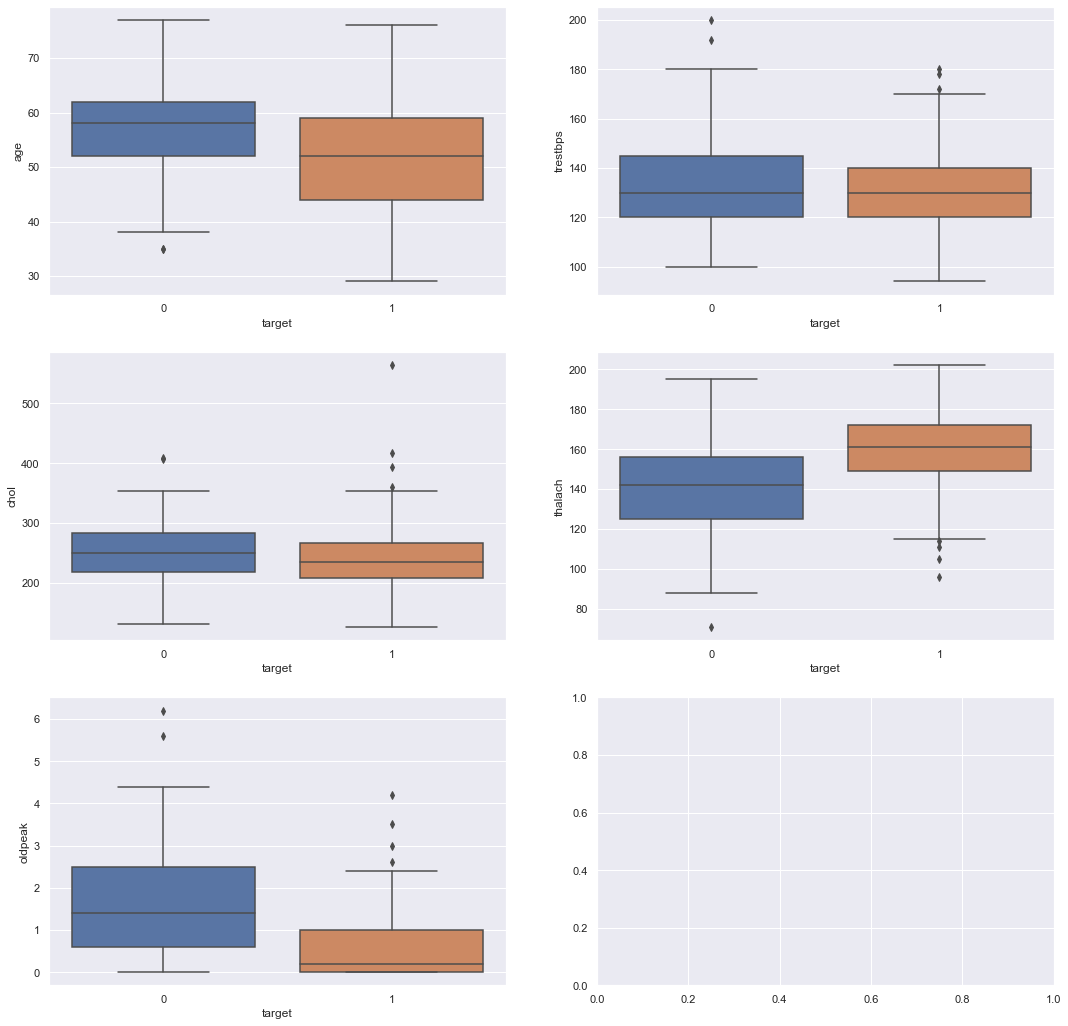

In [39]:
# non-categorical features vs target:

fig, axes = plt.subplots(3,2,figsize=(18,18))

sns.boxplot('target', 'age', data = data, ax=axes[0, 0])
sns.boxplot('target', 'trestbps', data = data, ax=axes[0,1])
sns.boxplot('target', 'chol', data = data, ax=axes[1,0])
sns.boxplot('target', 'thalach', data = data, ax=axes[1,1])
sns.boxplot('target', 'oldpeak', data = data, ax=axes[2,0])

In [44]:
# non-categorical features vs target barplots:

#fig, axes = plt.subplots(3,2,figsize=(18,18))

#sns.barplot('target', 'age', data = data, ax=axes[0, 0])
#sns.barplot('target', 'trestbps', data = data, ax=axes[0,1])
#sns.barplot('target', 'chol', data = data, ax=axes[1,0])
#sns.barplot('target', 'thalach', data = data, ax=axes[1,1])
#sns.barplot('target', 'oldpeak', data = data, ax=axes[2,0])

In [45]:
#fig = plt.figure(figsize = (8,6))
#sns.barplot(x = 'target', y = 'age', data = df)
#plt.ylim(30, 60)

In [46]:
#fig = plt.figure(figsize = (8,6))
#sns.barplot(x = 'target', y = 'chol', data = df)
#plt.ylim(230, 260)

In [ ]:
# Categorical features vs target:

In [12]:
#sns.countplot(x='sex', data=df)
#plt.xlabel("Sex (0 = female, 1= male)")
#plt.show()

Text(0.5, 1.0, 'Target vs Gender')

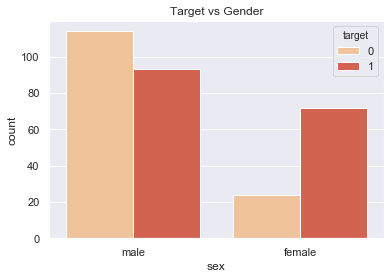

In [40]:
sns.countplot(data= df, x='sex',hue='target', palette="OrRd")
plt.title('Target vs Gender')

Text(0.5, 1.0, 'Target vs Chest Pain Type')

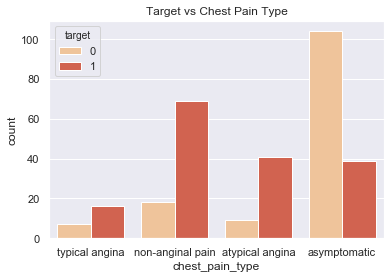

In [41]:
sns.countplot(data= df, x='chest_pain_type',hue='target', palette="OrRd")
plt.title('Target vs Chest Pain Type')

Text(0.5, 1.0, 'Target vs Thalassemia')

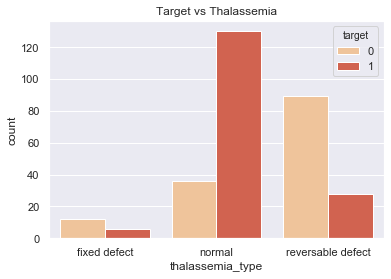

In [3]:
sns.countplot(data= df, x='thalassemia_type',hue='target', palette="OrRd")
plt.title('Target vs Thalassemia')


Text(0.5, 1.0, 'Target vs Slope')

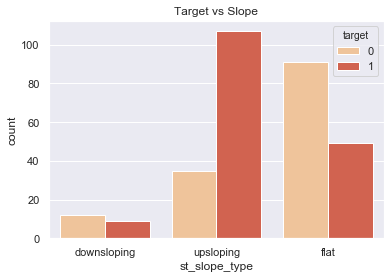

In [5]:
sns.countplot(data= df, x='st_slope_type',hue='target', palette="OrRd")
plt.title('Target vs Slope')

Text(0.5, 1.0, 'Target vs Fasting Blood Sugar')

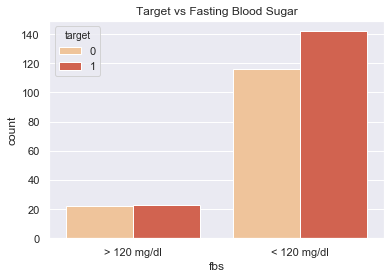

In [35]:
sns.countplot(data= df, x='fbs',hue='target', palette="OrRd")
plt.title('Target vs Fasting Blood Sugar')

Text(0.5, 1.0, 'Target vs Resting Electrocardiographic Measurement')

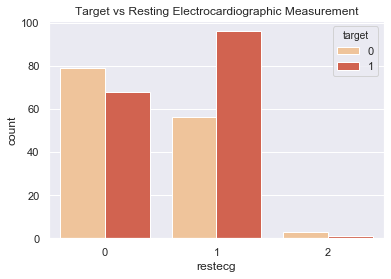

In [44]:
sns.countplot(data= df, x='restecg',hue='target', palette="OrRd")
plt.title('Target vs Resting Electrocardiographic Measurement')